# Teste Técnico para Ciência de Dados da Keyrus

## 1ª parte: Análise Exploratória

- [x] Tipos de variáveis
- [ ] Medidas de posição
- [ ] Medidas de dispersão
- [x] Tratamento de Missing Values
- [ ] Gráficos
- [x] Análise de Outliers

## 2ª parte: Estatística

- [ ] Estatística descritiva
- [ ] Identificação das distribuições das variáveis

## 3ª parte: Modelagem

- [ ] Modelos de previsão
- [ ] Escolha de melhor modelo
- [ ] Avaliação de resultados
- [ ] Métricas

## Imports

In [1]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno # missing values

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Other
from IPython.display import Image
import warnings
import os
import pprint

## Preparação do Diretório Principal

In [2]:
def exit_current_directory():
    # PATH current
    path = os.getcwd()
    os.chdir('..')
    print('Current working directory:\n{}\n'.format(os.getcwd()))
    
exit_current_directory()

Current working directory:
/home/campos/projetos/challenges/challenge-keyrus



## Preparação do Ambiente

In [3]:
from src.prepare_environment import *


main()

Requirements this project:


--------------------------------------------------
Configuration Environment:

OS:
Linux
Distributor ID:	Ubuntu
Description:	Ubuntu 19.04
Release:	19.04
Codename:	disco

Python Version:
Python 3.7.3

Pip Version:
pip 19.1.1 from /home/campos/projetos/venv_global/lib/python3.7/site-packages/pip (python 3.7)

Jupyter Version:
jupyter core     : 4.5.0
jupyter-notebook : 5.7.8
qtconsole        : 4.5.1
ipython          : 7.5.0
ipykernel        : 5.1.1
jupyter client   : 5.2.4
jupyter lab      : not installed
nbconvert        : 5.5.0
ipywidgets       : 7.4.2
nbformat         : 4.4.0
traitlets        : 4.3.2

--------------------------------------------------
Structure This Project:

.
├── config_environment.txt
├── data
│   ├── callcenter_descricao.txt
│   └── callcenter_marketing.csv
├── external_requirements.txt
├── __init__.py
├── LICENSE
├── notebooks
│   ├── 1-analise-exploratoria.ipynb
│   ├── 2-estatistica.ipynb
│   └── 3-modelagem.ipynb
├── README.md
├── 

## Cell Format

In [4]:
# Guarantees visualization inside the jupyter
%matplotlib inline

# format the data os all table (float_format 3)
pd.set_option('display.float_format', '{:.6}'.format)

pp = pprint.PrettyPrinter(indent=4)

# param config
rc={'savefig.dpi': 75, 
    'figure.autolayout': False, 
    'figure.figsize': [17, 5], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 10, 
    'lines.linewidth': 2.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 14,
    'xtick.labelsize': 12, 
    'ytick.labelsize': 12}

# Print max 100 rows and all columns
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', None)

# Definition color and map de colors
default_color = '#56B4E9'
colormap = plt.cm.cool

# Single colour palettes for good and bad outcomes
good_palette = ['#44cc44']
bad_palette = ['#cc4444']
# Colour palette for gender - traditional light pink (female), light blue (male)
gender_palette = ['#B0C4DE','#FFB6C1']
# Colour palette for ticket class - gold (first), silver (second), bronze (third)
class_palette = ['#FFD700','#C0C0C0','#CD7F32']

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# graph style
sns.set(style='dark',rc=rc)

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

## Carregamento dos Dados

Irei trabalhar com dataframe.

In [5]:
%%time

df_callcenter = pd.read_csv('data/callcenter_marketing.csv', 
                            encoding='utf8',
                            delimiter=',',
                            verbose=True)

Tokenization took: 34.20 ms
Type conversion took: 46.24 ms
Parser memory cleanup took: 0.01 ms
Tokenization took: 12.62 ms
Type conversion took: 17.33 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 133 ms, sys: 12.2 ms, total: 145 ms
Wall time: 143 ms


## Variáveis Globais

In [6]:
# Lists that will be manipulated in the data processing
list_columns = []
list_categorical_col = []
list_numerical_col = []

In [7]:
def get_col(df: 'dataframe', type_descr: 'numpy') -> list:
    """
    Function get list columns 
    
    Args:
    type_descr
        np.number, np.object -> return list with all columns
        np.number            -> return list numerical columns 
        np.object            -> return list object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')    
    else:
        return col.tolist() 

In [8]:
list_numerical_col = get_col(df=df_callcenter,
                             type_descr=np.number)
list_categorical_col = get_col(df=df_callcenter,
                               type_descr=np.object)
list_columns = get_col(df=df_callcenter,
                       type_descr=[np.object, np.number])

---

## Análise Exploratória

In [9]:
!cat data/callcenter_descricao.txt

O dataset fornece o resultado de uma campanha de marketing para cada usuário (sim - comprou / nao - não comprou)

Temos como variáveis:

Dados do cliente:
   1 - idade
   2 - profissao
   3 - estado_civil
   4 - educacao
   5 - inadimplente
   6 - emprestimo_moradia: possui empréstimo para moradia?
   7 - emprestimo_pessoal: possui empréstimo pessoal?
Dados relacionados com últimos contatos:
   8 - meio_contato: tipo de contato
   9 - mes: último mês de contato
  10 - dia_da_semana: último dia da semana de contato
  11 - duracao: última duração do contato, em segundos. Nota: este atributo causa overfitting no modelo.
Outras variáveis:
  12 - qtd_contatos_campanha: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - dias_ultimo_contato: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - qtd_contatos_total: number of contacts pe

#### Notas
- O callcenter é voltado à vendas

### Análise das Primeiras Linhas

In [10]:
display(df_callcenter.head(10))

,Unnamed: 0,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
0,0,56,dona_casa,casado,fundamental_4a,nao,nao,nao,telefone,mai,seg,261,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
1,1,57,servicos,casado,ensino_medio,NaN,nao,nao,telefone,mai,seg,149,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
2,2,37,servicos,casado,ensino_medio,nao,sim,nao,telefone,mai,seg,226,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
3,3,40,admin.,casado,fundamental_6a,nao,nao,nao,telefone,mai,seg,151,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
4,4,56,servicos,casado,ensino_medio,nao,nao,sim,telefone,mai,seg,307,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
5,5,45,servicos,casado,fundamental_9a,NaN,nao,nao,telefone,mai,seg,198,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
6,6,59,admin.,casado,curso_tecnico,nao,nao,nao,telefone,mai,seg,139,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
7,7,41,colarinho_azul,casado,NaN,NaN,nao,nao,telefone,mai,seg,217,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
8,8,24,tecnico,solteiro,curso_tecnico,nao,sim,nao,telefone,mai,seg,380,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao
9,9,25,servicos,solteiro,ensino_medio,nao,sim,nao,telefone,mai,seg,50,1,999,0,nao_existente,93.994,-36.4,4.857,5191.0,nao


### Remover a Coluna de Índice
- Quando se converte um arquivo de `csv` para `dataframe` é inserido um índice.
- Então, o dataframe já tem um índice e trás algumas funcionalidades que auxiliar a manipulação dos dados.
- Analisar uma tabela com um índice que não seja do dataframe pode ser prejudicial para uma análise, como por exemplo na detecção de valores duplicados.

In [11]:
df_callcenter = df_callcenter.drop(columns='Unnamed: 0', axis=0)

### Formato dos Dados 

In [12]:
print("Dataframe:\n{} rows\n{} columns".format(df_callcenter.shape[0],
                                               df_callcenter.shape[1]))

Dataframe:
41188 rows
20 columns


### Informações sobre as Colunas
- Nomes
- Linhas por colunas
- Tipos de dados em cada coluna
- Formato do dataframe

In [13]:
list_columns = (df_callcenter.columns).tolist()

print("-"*25, "List Columns", "-"*25, end='\n')
display(list_columns)

------------------------- List Columns -------------------------


['idade',
 'profissao',
 'estado_civil',
 'educacao',
 'inadimplente',
 'emprestimo_moradia',
 'emprestimo_pessoal',
 'meio_contato',
 'mes',
 'dia_da_semana',
 'duracao',
 'qtd_contatos_campanha',
 'dias_ultimo_contato',
 'qtd_contatos_total',
 'campanha_anterior',
 'indice_precos_consumidor',
 'indice_confianca_consumidor',
 'euribor3m',
 'numero_empregados',
 'resultado']

**OBS:** Não há espaços em branco nos nomes de colunas

In [14]:
print(df_callcenter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
idade                          41188 non-null int64
profissao                      40858 non-null object
estado_civil                   41108 non-null object
educacao                       39457 non-null object
inadimplente                   32591 non-null object
emprestimo_moradia             40198 non-null object
emprestimo_pessoal             40198 non-null object
meio_contato                   41188 non-null object
mes                            41188 non-null object
dia_da_semana                  41188 non-null object
duracao                        41188 non-null int64
qtd_contatos_campanha          41188 non-null int64
dias_ultimo_contato            41188 non-null int64
qtd_contatos_total             41188 non-null int64
campanha_anterior              41188 non-null object
indice_precos_consumidor       41188 non-null float64
indice_confianca_consumidor    41188 non-null f

Neste momento não há necessidade de formatar as colunas para outros tipos de dados.

In [15]:
print(df_callcenter.nunique())

idade                            78
profissao                        11
estado_civil                      3
educacao                          7
inadimplente                      2
emprestimo_moradia                2
emprestimo_pessoal                2
meio_contato                      2
mes                              10
dia_da_semana                     5
duracao                        1544
qtd_contatos_campanha            42
dias_ultimo_contato              27
qtd_contatos_total                8
campanha_anterior                 3
indice_precos_consumidor         26
indice_confianca_consumidor      26
euribor3m                       316
numero_empregados                11
resultado                         2
dtype: int64


In [16]:
def show_measures_location(df: 'dataframe', type_descr: 'list') -> None:
    """
    Function get summary statistic 
    
    Args:
    type_descr
        np.number, np.object  -> return summary statistic with all columns
        np.number             -> return summary statistic numerical columns 
        np.object             -> return summary statistic object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index  
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n\n')    
    else:
        list_col = col.tolist()
        percentage = (len(list_col) / df.shape[1]) * 100
        
        print("-"*25, "MEASURES OF LOCALIZATION", "-"*25, end='\n\n')
        print(f"TOTAL columns {type_descr}: {len(list_col)}")
        print("PERCENTAGE {} in dataframe: {:3.4} %".format(type_descr, percentage))
        
        return df.describe(include=type_descr)

In [17]:
show_measures_location(df=df_callcenter,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 20
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
count,41188.0,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188.0,41188.0,41188.0,41188.0,41188,41188.0,41188.0,41188.0,41188.0,41188
unique,nan,11,3,7,2,2,2,2,10,5,nan,nan,nan,nan,3,nan,nan,nan,nan,2
top,nan,admin.,casado,graduacao_completa,nao,sim,nao,celular,mai,qui,nan,nan,nan,nan,nao_existente,nan,nan,nan,nan,nao
freq,nan,10422,24928,12168,32588,21576,33950,26144,13769,8623,nan,nan,nan,nan,35563,nan,nan,nan,nan,36548
mean,40.0241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285,2.56759,962.475,0.172963,NaN,93.5757,-40.5026,3.62129,5167.04,NaN
std,10.4212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279,2.77001,186.911,0.494901,NaN,0.57884,4.6282,1.73445,72.2515,NaN
min,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,92.201,-50.8,0.634,4963.6,NaN
25%,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,1.0,999.0,0.0,NaN,93.075,-42.7,1.344,5099.1,NaN
50%,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,2.0,999.0,0.0,NaN,93.749,-41.8,4.857,5191.0,NaN
75%,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.0,3.0,999.0,0.0,NaN,93.994,-36.4,4.961,5228.1,NaN


#### Colunas Numéricas

In [18]:
show_measures_location(df=df_callcenter,
                       type_descr=[np.number])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>]: 9
PERCENTAGE [<class 'numpy.number'>] in dataframe: 45.0 %


,idade,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados
count,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0,41188.0
mean,40.0241,258.285,2.56759,962.475,0.172963,93.5757,-40.5026,3.62129,5167.04
std,10.4212,259.279,2.77001,186.911,0.494901,0.57884,4.6282,1.73445,72.2515
min,17.0,0.0,1.0,0.0,0.0,92.201,-50.8,0.634,4963.6
25%,32.0,102.0,1.0,999.0,0.0,93.075,-42.7,1.344,5099.1
50%,38.0,180.0,2.0,999.0,0.0,93.749,-41.8,4.857,5191.0
75%,47.0,319.0,3.0,999.0,0.0,93.994,-36.4,4.961,5228.1
max,98.0,4918.0,56.0,999.0,7.0,94.767,-26.9,5.045,5228.1


#### Colunas Categóricas

In [19]:
show_measures_location(df=df_callcenter,
                       type_descr=[np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'object'>]: 11
PERCENTAGE [<class 'object'>] in dataframe: 55.0 %


,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,campanha_anterior,resultado
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,casado,graduacao_completa,nao,sim,nao,celular,mai,qui,nao_existente,nao
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


- Persistir as colunas em suas respectivas listas

---

## Dados Irrelevantes
Nesta parte vou analisar cada coluna categórica para ver se os dados inseridos fazem sentido no meio em que se encontram.

In [20]:
def show_categorical_values(df: 'DataFrame', *columns: list) -> None:
    for column in columns:
        list_unique = df[column].unique()
        print(f"The categorical column {column} contains this values:\n{list_unique}\n")

In [21]:
show_categorical_values(df_callcenter, *list_categorical_col)

The categorical column profissao contains this values:
['dona_casa' 'servicos' 'admin.' 'colarinho_azul' 'tecnico' 'aposentado'
 'gerente' 'desempregado' 'informal' nan 'empreendedor' 'estudante']

The categorical column estado_civil contains this values:
['casado' 'solteiro' 'divorciado' nan]

The categorical column educacao contains this values:
['fundamental_4a' 'ensino_medio' 'fundamental_6a' 'fundamental_9a'
 'curso_tecnico' nan 'graduacao_completa' 'analfabeto']

The categorical column inadimplente contains this values:
['nao' nan 'sim']

The categorical column emprestimo_moradia contains this values:
['nao' 'sim' nan]

The categorical column emprestimo_pessoal contains this values:
['nao' 'sim' nan]

The categorical column meio_contato contains this values:
['telefone' 'celular']

The categorical column mes contains this values:
['mai' 'jun' 'jul' 'ago' 'out' 'nov' 'dez' 'mar' 'abr' 'set']

The categorical column dia_da_semana contains this values:
['seg' 'ter' 'qua' 'qui' 'sex'

#### Notas
- Não há valores escritos de forma errada ou duplicada.
- Todos os valores estão fazendo sentido semântico com suas colunas.

---

### Data Preprocessing
- Algoritmos de aprendizagem estatística, trabalham apenas com valores numéricos, então, se deixar valores de rótulo como strings, a librarie scikit-learn, por exemplo, faria a conversão internamente (mais especificamente, os rótulos de string serão convertidos em valores flutuantes desconhecidos).

#### Mapear Valores Internos das Colunas 

In [22]:
# map

def map_values(df: 'dataframe', column: str, dict_label: dict) -> None:
    df[column] = df[column].map(dict_label)    
    return print(f'Type column {column}: {df[column].dtypes}')

Os únicos dados das colunas categóricas que fazem sentido ter uma ordem numérica são:
- `mes`
- `dia_da_semana`

In [23]:
dict_week = {'seg': 1,
             'ter': 2,
             'qua': 3,
             'qui': 4,
             'sex': 5}

# dict not contains jan and feb
dict_month = {'mar': 3,
              'abr': 4,
              'mai': 5,
              'jun': 6,
              'jul': 7,
              'ago': 8,
              'set': 9,
              'out': 10,
              'nov': 11,
              'dez': 12}

In [24]:
map_values(df_callcenter, 'mes', dict_month)
map_values(df_callcenter, 'dia_da_semana', dict_week)

Type column mes: int64
Type column dia_da_semana: int64


In [25]:
# I used the dictionary because they are more efficient in these cases
# https://stackoverflow.com/questions/22084338/pandas-dataframe-performance

def generate_cat_unique_by_col(df: 'dataframe', *columns: list) -> dict:
    dict_unique = {}
    
    for column in columns:
        list_unique = df[column].unique().tolist()
        dict_column = {}
    
        for element in list_unique:
            if isinstance(element, float) is True:  # type nan is float
                continue
            dict_column[element] = int(list_unique.index(element))
        # add dict column in principal dict 
        dict_unique[column] = dict_column          
    
    print("-"*25, "Dictionary with Values Map by Column", "-"*25, end='\n\n')
    return dict_unique

In [26]:
dict_cat_unique = generate_cat_unique_by_col(df_callcenter, 
                                             *list_categorical_col)

pp.pprint(dict_cat_unique)

------------------------- Dictionary with Values Map by Column -------------------------

{   'campanha_anterior': {'fracasso': 1, 'nao_existente': 0, 'sucesso': 2},
    'dia_da_semana': {1: 0, 2: 1, 3: 2, 4: 3, 5: 4},
    'educacao': {   'analfabeto': 7,
                    'curso_tecnico': 4,
                    'ensino_medio': 1,
                    'fundamental_4a': 0,
                    'fundamental_6a': 2,
                    'fundamental_9a': 3,
                    'graduacao_completa': 6},
    'emprestimo_moradia': {'nao': 0, 'sim': 1},
    'emprestimo_pessoal': {'nao': 0, 'sim': 1},
    'estado_civil': {'casado': 0, 'divorciado': 2, 'solteiro': 1},
    'inadimplente': {'nao': 0, 'sim': 2},
    'meio_contato': {'celular': 1, 'telefone': 0},
    'mes': {3: 7, 4: 8, 5: 0, 6: 1, 7: 2, 8: 3, 9: 9, 10: 4, 11: 5, 12: 6},
    'profissao': {   'admin.': 2,
                     'aposentado': 5,
                     'colarinho_azul': 3,
                     'desempregado': 7,
          

- É preciso que todos os dados que eram categóricos sejam valores numéricos.

In [27]:
map_values(df_callcenter, 'profissao', dict_cat_unique['profissao'])
map_values(df_callcenter, 'estado_civil', dict_cat_unique['estado_civil'])
map_values(df_callcenter, 'educacao', dict_cat_unique['educacao'])

map_values(df_callcenter, 'inadimplente', dict_cat_unique['inadimplente'])
map_values(df_callcenter, 'emprestimo_moradia', dict_cat_unique['emprestimo_moradia'])
map_values(df_callcenter, 'emprestimo_pessoal', dict_cat_unique['emprestimo_pessoal'])

map_values(df_callcenter, 'meio_contato', dict_cat_unique['meio_contato'])
map_values(df_callcenter, 'campanha_anterior', dict_cat_unique['campanha_anterior'])

map_values(df_callcenter, 'resultado', dict_cat_unique['resultado'])

Type column profissao: float64
Type column estado_civil: float64
Type column educacao: float64
Type column inadimplente: float64
Type column emprestimo_moradia: float64
Type column emprestimo_pessoal: float64
Type column meio_contato: int64
Type column campanha_anterior: int64
Type column resultado: int64


#### NOTA
- A partir de agora temos novos valores para as lista de colunas

In [28]:
# numerical
list_numerical_col = get_col(df_callcenter, np.number)
display(list_numerical_col)

# categorical
list_categorical_col = get_col(df_callcenter, np.object)
display(list_categorical_col)

['idade',
 'profissao',
 'estado_civil',
 'educacao',
 'inadimplente',
 'emprestimo_moradia',
 'emprestimo_pessoal',
 'meio_contato',
 'mes',
 'dia_da_semana',
 'duracao',
 'qtd_contatos_campanha',
 'dias_ultimo_contato',
 'qtd_contatos_total',
 'campanha_anterior',
 'indice_precos_consumidor',
 'indice_confianca_consumidor',
 'euribor3m',
 'numero_empregados',
 'resultado']

Dataframe not contains <class 'object'> columns !


None

---

## Valores Duplicados
É quando a linha inteira é duplicada

In [29]:
# duplicated()

def check_quat_duplicated_data(df: 'DataFrame') -> None:
    """
    Check if contains duplicated data
    Mark duplicates as ``True`` if enough row equal
    Except for the first occurrence.    
    """
    duplicated = df.duplicated().sum()
    total_lines = df_callcenter.shape[0]
    percentage = (duplicated/total_lines) * 100
    
    print("-"*25, "DUPLICATED DATA", "-"*25,)
    print("\nSHAPE of data: {}".format(df.shape[0]))
    print("TOTAL duplicated data: {}".format(duplicated))
    print("PERCENTAGE duplicated data: {} %".format(percentage)) 

In [30]:
check_quat_duplicated_data(df_callcenter)

------------------------- DUPLICATED DATA -------------------------

SHAPE of data: 41188
TOTAL duplicated data: 12
PERCENTAGE duplicated data: 0.02913469942701758 %


#### Visualização dos Valores Duplicados

In [31]:
# Create dataframe only duplicated values
df_duplicated_value = df_callcenter[df_callcenter.duplicated(keep=False)]

display(df_duplicated_value.head(12))

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
1265,39,3.0,0.0,2.0,0.0,0.0,0.0,0,5,4,124,1,999,0,0,93.994,-36.4,4.855,5191.0,0
1266,39,3.0,0.0,2.0,0.0,0.0,0.0,0,5,4,124,1,999,0,0,93.994,-36.4,4.855,5191.0,0
12260,36,5.0,0.0,nan,0.0,0.0,0.0,0,7,4,88,1,999,0,0,93.918,-42.7,4.966,5228.1,0
12261,36,5.0,0.0,nan,0.0,0.0,0.0,0,7,4,88,1,999,0,0,93.918,-42.7,4.966,5228.1,0
14155,27,4.0,1.0,4.0,0.0,0.0,0.0,1,7,1,331,2,999,0,0,93.918,-42.7,4.962,5228.1,0
14234,27,4.0,1.0,4.0,0.0,0.0,0.0,1,7,1,331,2,999,0,0,93.918,-42.7,4.962,5228.1,0
16819,47,4.0,2.0,1.0,0.0,1.0,0.0,1,7,4,43,3,999,0,0,93.918,-42.7,4.962,5228.1,0
16956,47,4.0,2.0,1.0,0.0,1.0,0.0,1,7,4,43,3,999,0,0,93.918,-42.7,4.962,5228.1,0
18464,32,4.0,1.0,4.0,0.0,1.0,0.0,1,7,4,128,1,999,0,0,93.918,-42.7,4.968,5228.1,0
18465,32,4.0,1.0,4.0,0.0,1.0,0.0,1,7,4,128,1,999,0,0,93.918,-42.7,4.968,5228.1,0


#### Remover Valores Duplicados

In [32]:
# drop_duplicates()

df_callcenter = df_callcenter.drop_duplicates(keep='first')
print("Shape dataframe = ", df_callcenter.shape)

Shape dataframe =  (41176, 20)


---

## Missing values

In [33]:
# isnull()

def check_if_contains_missing_val(df: 'DataFrame'):
    """
    Return TRUE, if collumn contains values missing
    """
    list_columns_missing = []
    
    for index, value in enumerate(df.isnull().any()):
        if value is True:
            list_columns_missing.append(df.columns[index])
    
    if len(list_columns_missing) > 0:
        print("Columns's name with missing values:")
        return list_columns_missing   
    
    return "The dataframe NOT contains missing values."

In [34]:
list_columns_m_v = check_if_contains_missing_val(df_callcenter)

display(list_columns_m_v)  # display show one column by line

Columns's name with missing values:


['profissao',
 'estado_civil',
 'educacao',
 'inadimplente',
 'emprestimo_moradia',
 'emprestimo_pessoal']

In [35]:
def check_quat_missing_data(df: 'DataFrame', columns_m_v: list) -> None:
    """
    Check if contains missing data
    Mark missing, if line contains NaN in any column
    """    
    missing_values_count = df.isnull().sum()
    total_missing = missing_values_count.sum()
    total_lines = df.shape[0]
    total_cells = np.product(df.shape)
        
    percentage_by_line = (total_missing/total_lines) * 100
    percentage_by_cell = (total_missing/total_cells) * 100
    
    # by column
    quant_missing_by_column = df[columns_m_v].isnull().sum()
    percentage_missing_by_column = (quant_missing_by_column/total_lines) * 100
    
    print("-"*25, "MISSING VALUES", "-"*25)
    print("\nSHAPE of data: {}".format(df.shape[0]))
    print("TOTAL missing values: {}".format(total_missing))
    print("TOTAL missing values by column:\n{}\n".format(quant_missing_by_column))
    
    print("PERCENTAGE missing values by line: {:2.3} %".format(percentage_by_line))
    print("PERCENTAGE missing values by cell: {:2.3} %".format(percentage_by_cell))
    print("PERCENTAGE missing values by column:\n{}".format(percentage_missing_by_column))       

In [36]:
check_quat_missing_data(df_callcenter, list_columns_m_v)

------------------------- MISSING VALUES -------------------------

SHAPE of data: 41176
TOTAL missing values: 12716
TOTAL missing values by column:
profissao              330
estado_civil            80
educacao              1730
inadimplente          8596
emprestimo_moradia     990
emprestimo_pessoal     990
dtype: int64

PERCENTAGE missing values by line: 30.9 %
PERCENTAGE missing values by cell: 1.54 %
PERCENTAGE missing values by column:
profissao            0.801438
estado_civil         0.194288
educacao              4.20148
inadimplente          20.8762
emprestimo_moradia    2.40431
emprestimo_pessoal    2.40431
dtype: float64


#### Análise Gráfica de Missing Values

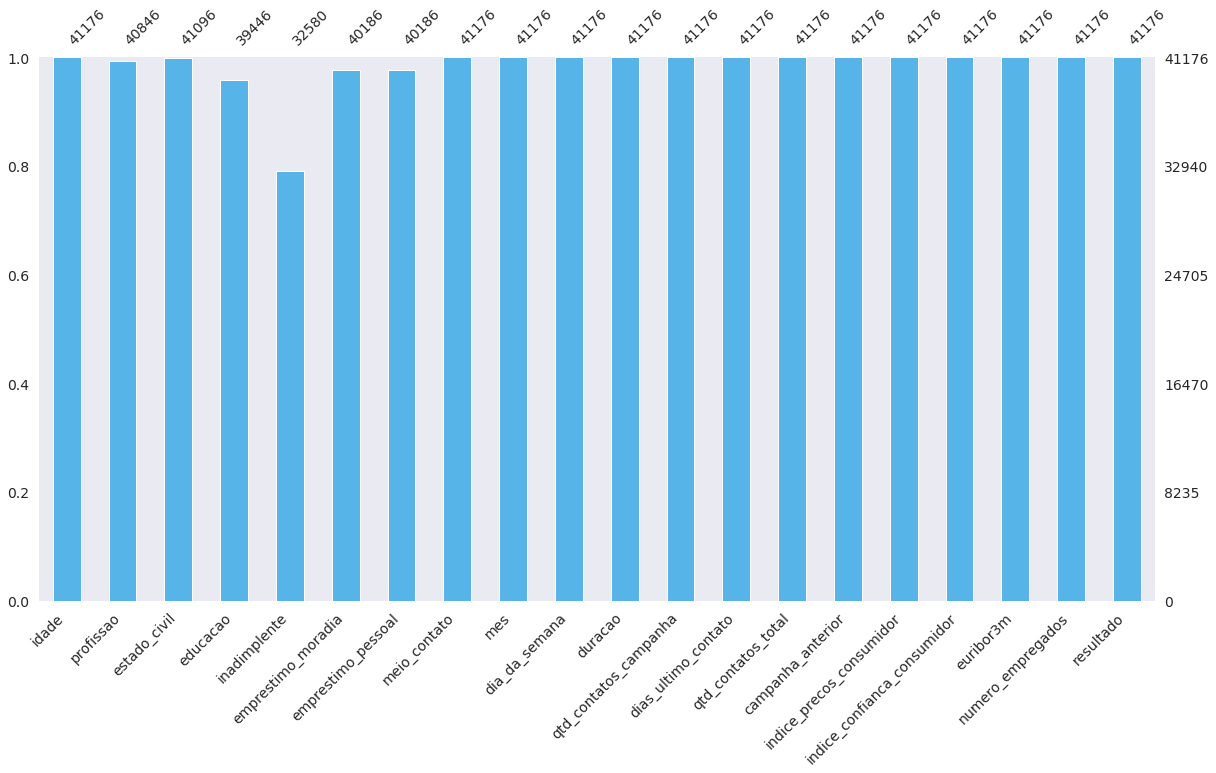

In [37]:
# Show missing by columns
msno.bar(df_callcenter,figsize=(20,10),
         color=default_color,
         fontsize=14,
         labels=True)

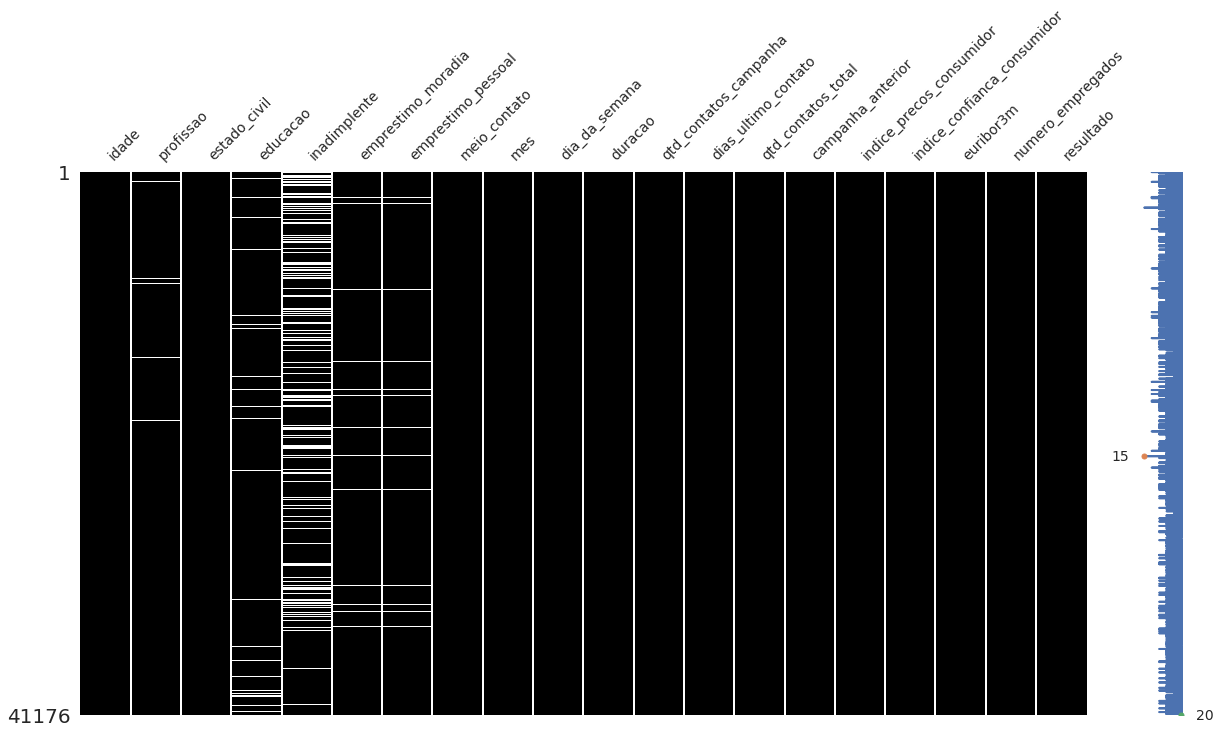

In [38]:
unsorted_data = msno.nullity_sort(df_callcenter)

msno.matrix(unsorted_data, 
            color=None,
            figsize=(20,10),
            fontsize=14)

#### Notas
- Há somente missing values em provindos de **dados categóricos** que foram convertidos.
- Se deletar as linhas com dados faltantes pode ser um grande prejuízo, pois temos **30.8 %** linhas apresentando esse padrão porém somente **1.5 %** das células apresenta _missing values_.

#### Tratamento de Missing Values
- Vou utilizar a técnica de preenchimento com o valor médio da coluna: `fillna`
- Adiciona menos variância ao dataset do que fazer uma interpolação 

In [39]:
%%timeit

[df_callcenter.fillna(df_callcenter.mean(), inplace=True) for col in df_callcenter.columns]

199 ms ± 5.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
# Check result
df_callcenter.head(10)

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
0,56,0.0,0.0,0.0,0.0,0.0,0.0,0,5,1,261,1,999,0,0,93.994,-36.4,4.857,5191.0,0
1,57,1.0,0.0,1.0,0.000184162,0.0,0.0,0,5,1,149,1,999,0,0,93.994,-36.4,4.857,5191.0,0
2,37,1.0,0.0,1.0,0.0,1.0,0.0,0,5,1,226,1,999,0,0,93.994,-36.4,4.857,5191.0,0
3,40,2.0,0.0,2.0,0.0,0.0,0.0,0,5,1,151,1,999,0,0,93.994,-36.4,4.857,5191.0,0
4,56,1.0,0.0,1.0,0.0,0.0,1.0,0,5,1,307,1,999,0,0,93.994,-36.4,4.857,5191.0,0
5,45,1.0,0.0,3.0,0.000184162,0.0,0.0,0,5,1,198,1,999,0,0,93.994,-36.4,4.857,5191.0,0
6,59,2.0,0.0,4.0,0.0,0.0,0.0,0,5,1,139,1,999,0,0,93.994,-36.4,4.857,5191.0,0
7,41,3.0,0.0,3.20182,0.000184162,0.0,0.0,0,5,1,217,1,999,0,0,93.994,-36.4,4.857,5191.0,0
8,24,4.0,1.0,4.0,0.0,1.0,0.0,0,5,1,380,1,999,0,0,93.994,-36.4,4.857,5191.0,0
9,25,1.0,1.0,1.0,0.0,1.0,0.0,0,5,1,50,1,999,0,0,93.994,-36.4,4.857,5191.0,0


---

## Conversão de Tipos
- A partir daqui o dataframe pode ser do tipo: `integer` pois os missing values foram tratados.
- Há exceções que continuaram sendo float, contudo limitado a 2 dígitos depois da vírgula:
  - `indice_precos_consumidor`
  - `indice_confianca_consumidor`
  - `euribor3m`

In [41]:
def handler_typing(df: 'dataframe', type_col: str, list_cont_feature: list, *columns: list):
    for column in columns:
        if column in list_cont_feature:
            print(column)
            df[column] = df[column].map('{:,.2f}'.format) \
                        .astype(float) # object -> float
            continue
            
        df[column] = df[column].astype(dtype=type_col, errors='raise')
    
    return df.info(), display(df.head())

In [42]:
list_cont_feature = ['indice_precos_consumidor',
                     'indice_confianca_consumidor',
                     'euribor3m']

handler_typing(df_callcenter, 'int16', list_cont_feature, *list_columns)

indice_precos_consumidor
indice_confianca_consumidor
euribor3m
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
idade                          41176 non-null int16
profissao                      41176 non-null int16
estado_civil                   41176 non-null int16
educacao                       41176 non-null int16
inadimplente                   41176 non-null int16
emprestimo_moradia             41176 non-null int16
emprestimo_pessoal             41176 non-null int16
meio_contato                   41176 non-null int16
mes                            41176 non-null int16
dia_da_semana                  41176 non-null int16
duracao                        41176 non-null int16
qtd_contatos_campanha          41176 non-null int16
dias_ultimo_contato            41176 non-null int16
qtd_contatos_total             41176 non-null int16
campanha_anterior              41176 non-null int16
indice_precos_consumidor       41176 non-null fl

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
0,56,0,0,0,0,0,0,0,5,1,261,1,999,0,0,93.99,-36.4,4.86,5191,0
1,57,1,0,1,0,0,0,0,5,1,149,1,999,0,0,93.99,-36.4,4.86,5191,0
2,37,1,0,1,0,1,0,0,5,1,226,1,999,0,0,93.99,-36.4,4.86,5191,0
3,40,2,0,2,0,0,0,0,5,1,151,1,999,0,0,93.99,-36.4,4.86,5191,0
4,56,1,0,1,0,0,1,0,5,1,307,1,999,0,0,93.99,-36.4,4.86,5191,0


(None, None)

#### Nota
- O dataframe diminuiu de **memory usage: 6.3 MB** para **memory usage: 3.8 MB**

---

## Outliers
- A função `pandas.describe()` trás algumas informações sobre que compõem o boxplot.

In [43]:
df_callcenter.describe()

,idade,profissao,estado_civil,educacao,inadimplente,emprestimo_moradia,emprestimo_pessoal,meio_contato,mes,dia_da_semana,duracao,qtd_contatos_campanha,dias_ultimo_contato,qtd_contatos_total,campanha_anterior,indice_precos_consumidor,indice_confianca_consumidor,euribor3m,numero_empregados,resultado
count,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0,41176.0
mean,40.0238,3.62578,0.504809,3.19334,0.000145716,0.523873,0.151739,0.634714,6.60773,2.9796,258.316,2.56788,962.465,0.173013,0.169953,93.5752,-40.5029,3.62142,5166.85,0.112663
std,10.4207,2.40785,0.688443,2.15596,0.017071,0.499436,0.358772,0.481516,2.04101,1.41154,259.305,2.77032,186.937,0.494964,0.455811,0.579901,4.62786,1.73453,72.3282,0.316184
min,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,92.2,-50.8,0.63,4963.0,0.0
25%,32.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,102.0,1.0,999.0,0.0,0.0,93.08,-42.7,1.34,5099.0,0.0
50%,38.0,3.0,0.0,3.0,0.0,1.0,0.0,1.0,6.0,3.0,180.0,2.0,999.0,0.0,0.0,93.75,-41.8,4.86,5191.0,0.0
75%,47.0,4.0,1.0,6.0,0.0,1.0,0.0,1.0,8.0,4.0,319.0,3.0,999.0,0.0,0.0,93.99,-36.4,4.96,5228.0,0.0
max,98.0,11.0,2.0,7.0,2.0,1.0,1.0,1.0,12.0,5.0,4918.0,56.0,999.0,7.0,2.0,94.77,-26.9,5.04,5228.0,1.0


In [44]:
# quantile()

dict_quantile = {}


def calculate_quantile_by_col(df: 'dataframe', *columns: list) -> None:
    """
    Calculate boxplot
    """
    for column in columns:
        dict_col = {}
       
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1  # Interquartile range

        dict_col[column] = {'q1': q1,
                            'q3': q3,
                            'iqr': iqr}
        # add dict column in principal dict
        dict_quantile.update(dict_col)


def calculate_fence(dict_col: 'dataframe', *columns: list) -> None:
    for column in columns:
        dict_actual_col = dict_col[column]  # mount internal dict of dict_quantile
        dict_fence = {}  # auxiliar dict
        
        fence_low  = dict_actual_col['q1'] - 1.5 * dict_actual_col['iqr']
        fence_high = dict_actual_col['q3'] + 1.5 * dict_actual_col['iqr']
        
        dict_fence = {'fence_low': fence_low,
                     'fence_high': fence_high}
        
        # add dict column in principal dict
        dict_col[column].update(dict_fence)


def count_outlier(df: 'dataframe', dict_quantile: dict, *columns: list):
    for column in columns:
        # mount internal dict of dict_quantile
        dict_actual_col = dict_quantile[column]

        outlier_less_q1 = (df[column] < dict_actual_col['fence_low']).sum()  # numpy.int64
        outlier_more_q3 = (df[column] > dict_actual_col['fence_high']).sum()  # numpy.int64
        total = outlier_less_q1 + outlier_more_q3
        
        dict_outlier = {'outlier_less_q1': outlier_less_q1,
                        'outlier_more_q3': outlier_more_q3,
                        'outlier_total': total}
        
        # add dict column in principal dict
        dict_quantile[column].update(dict_outlier)
        
    print("-"*25, "Dict Quantilie", "-"*25, end='\n\n')
    return pp.pprint(dict_quantile)


def check_quat_outlier(df: 'dataframe', dict_quantile: dict, *columns: list):
    outlier_total = 0
    total_lines = df.shape[0]
    total_cells = np.product(df.shape)
    
    print("-"*15, "OUTLIERS", "-"*15)
    print("\nSHAPE of data: {}".format(df.shape[0]))
    print("\nPERCENTAGE outlier by column:") 
    
    # by column
    for column in columns:
        dict_actual_col = dict_quantile[column]  # mount internal dict of dict_quantile
        outlier_total += dict_actual_col['outlier_total']

        quant_outlier_by_col = dict_actual_col['outlier_total']
        percentage_outlier_by_col = (quant_outlier_by_col/total_lines) * 100
        
        print("{}: {:4.4} %".format(column, percentage_outlier_by_col)) 

        
    percentage_by_line = (outlier_total/total_lines) * 100
    percentage_by_cell = (outlier_total/total_cells) * 100
        
    print("PERCENTAGE outlier by line: {:2.3} %".format(percentage_by_line))
    print("PERCENTAGE outlier by cell: {:2.3} %".format(percentage_by_cell))
    print("\nTOTAL outlier: {}".format(outlier_total))

In [45]:
# run
calculate_quantile_by_col(df_callcenter, *list_columns)

calculate_fence(dict_quantile, *list_columns)

count_outlier(df_callcenter, dict_quantile, *list_columns)

------------------------- Dict Quantilie -------------------------

{   'campanha_anterior': {   'fence_high': 0.0,
                             'fence_low': 0.0,
                             'iqr': 0.0,
                             'outlier_less_q1': 0,
                             'outlier_more_q3': 5625,
                             'outlier_total': 5625,
                             'q1': 0.0,
                             'q3': 0.0},
    'dia_da_semana': {   'fence_high': 7.0,
                         'fence_low': -1.0,
                         'iqr': 2.0,
                         'outlier_less_q1': 0,
                         'outlier_more_q3': 0,
                         'outlier_total': 0,
                         'q1': 2.0,
                         'q3': 4.0},
    'dias_ultimo_contato': {   'fence_high': 999.0,
                               'fence_low': 999.0,
                               'iqr': 0.0,
                               'outlier_less_q1': 1515,
                   

In [46]:
check_quat_outlier(df_callcenter, dict_quantile, *list_columns)

--------------- OUTLIERS ---------------

SHAPE of data: 41176

PERCENTAGE outlier by column:
idade: 1.137 %
profissao: 9.112 %
estado_civil:  0.0 %
educacao:  0.0 %
inadimplente: 0.007286 %
emprestimo_moradia:  0.0 %
emprestimo_pessoal: 15.17 %
meio_contato:  0.0 %
mes:  0.0 %
dia_da_semana:  0.0 %
duracao: 7.196 %
qtd_contatos_campanha: 5.843 %
dias_ultimo_contato: 3.679 %
qtd_contatos_total: 13.66 %
campanha_anterior: 13.66 %
indice_precos_consumidor:  0.0 %
indice_confianca_consumidor: 1.083 %
euribor3m:  0.0 %
numero_empregados:  0.0 %
resultado: 11.27 %
PERCENTAGE outlier by line: 81.8 %
PERCENTAGE outlier by cell: 4.09 %

TOTAL outlier: 33690


#### Análise Gráfica de Outliers

In [47]:
def plot_box_plot(df: 'dataframe', data_set_name: str, xlim=None):
    """
    Creates a seaborn boxplot including all dependent
    
    Args:
    data_set_name: Name of title for the boxplot
    xlim: Set upper and lower x-limits
    
    Returns:
    Box plot with specified data_frame, title, and x-limits 
    """
    fig, ax = plt.subplots(figsize=(18, 10))

    if xlim is not None:
        plt.xlim(*xlim)
    
    plt.title(f"Horizontal Boxplot {data_set_name}")
        
    plt.ylabel('Dependent Variables')
    plt.xlabel('Measurement x')
    ax = sns.boxplot(data = df,
                    orient = 'h', 
                    palette = 'Set2',
                    notch = False, # box instead of notch shape 
                    sym = 'rs')  # red squares for outliers

    plt.show()

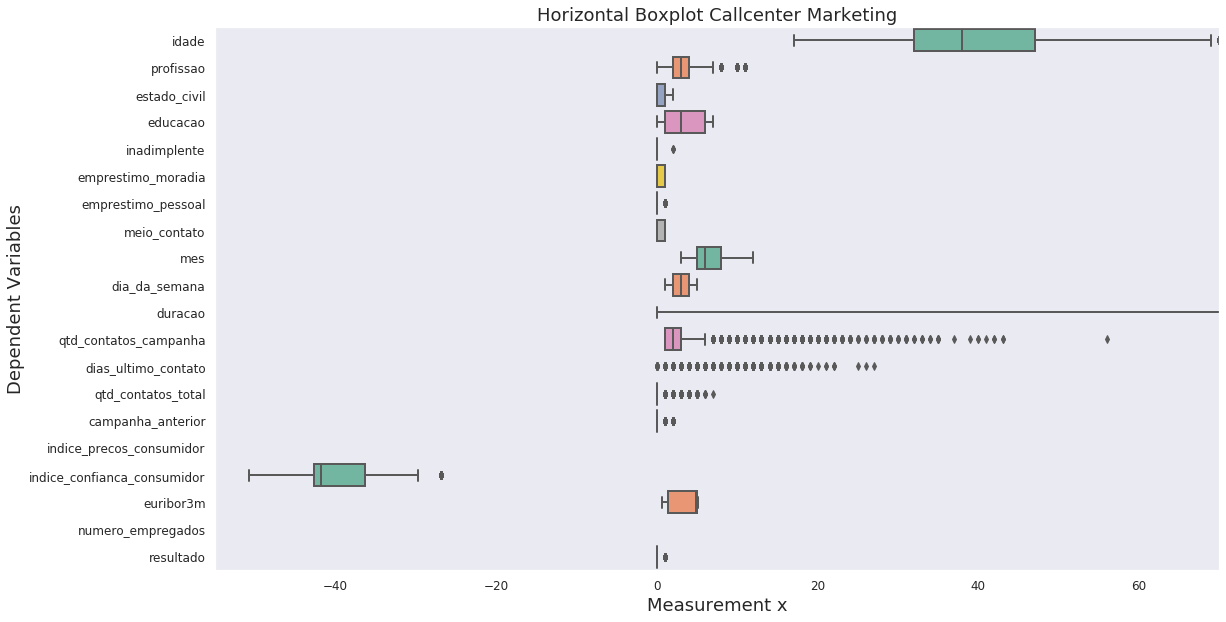

In [48]:
plot_box_plot(df_callcenter, 
              'Callcenter Marketing', 
              (-55, 70))

Os box plots ficaram muito dispersos, melhor analizar separadamente.

In [49]:
def show_boxplot(df, *columns):
    for column in columns:
        plt.figure (figsize = (17, 1)) 
        sns.boxplot(x=df[column],
                    width=0.3,
                    linewidth=1.0,
                    showfliers=True)

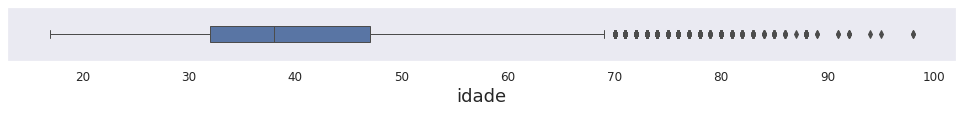

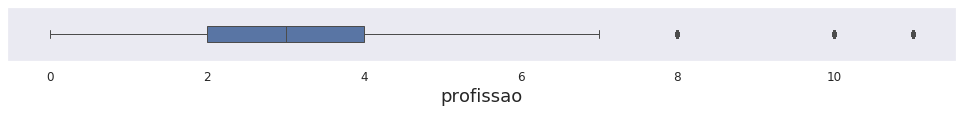

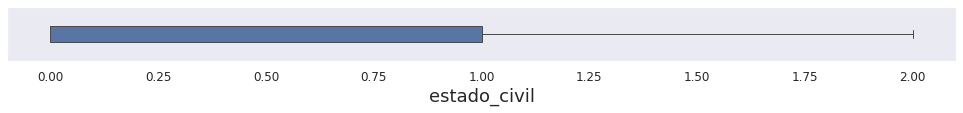

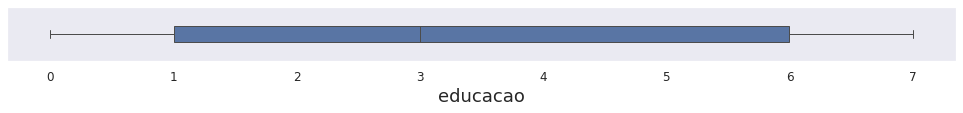

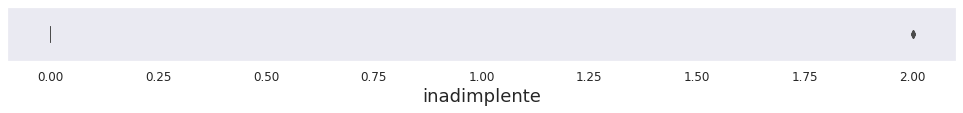

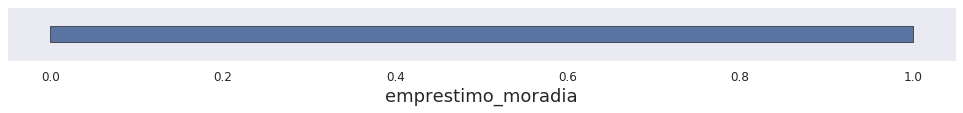

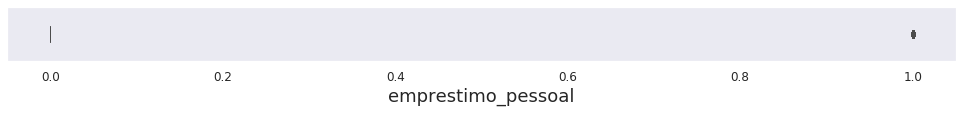

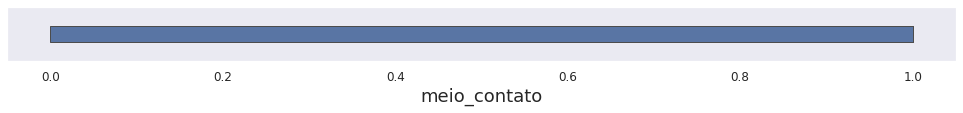

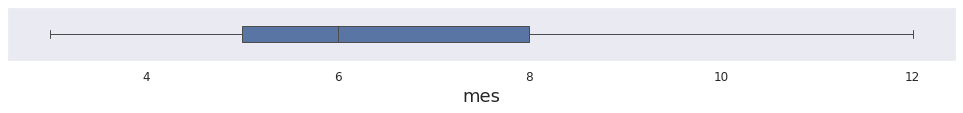

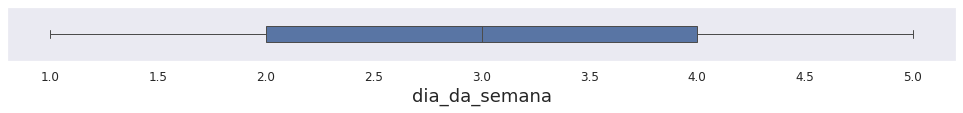

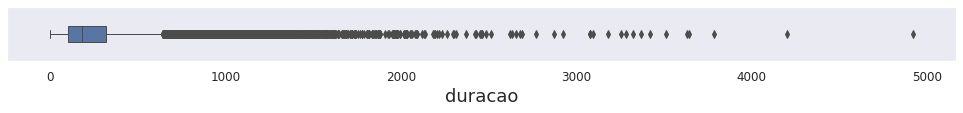

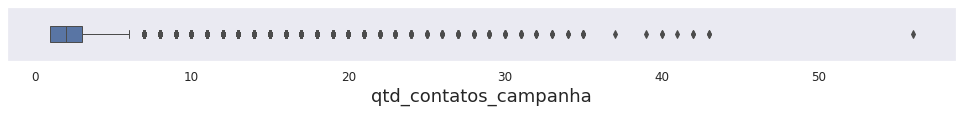

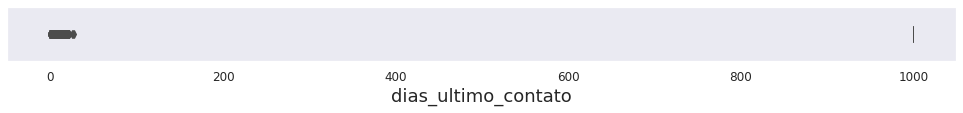

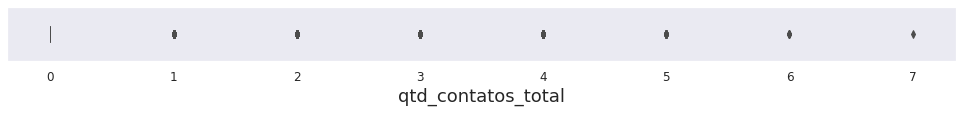

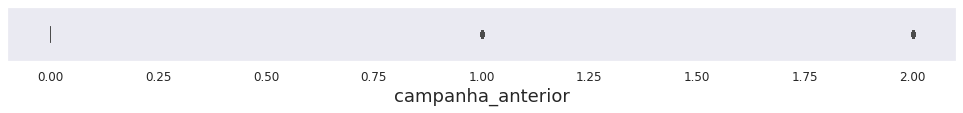

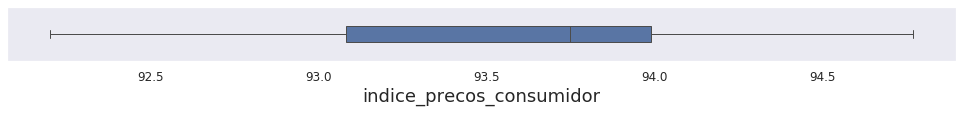

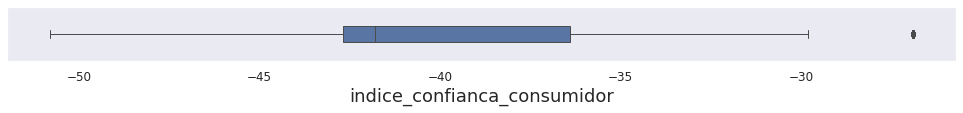

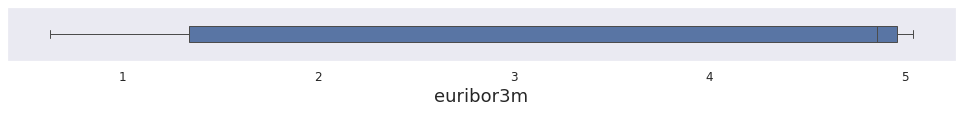

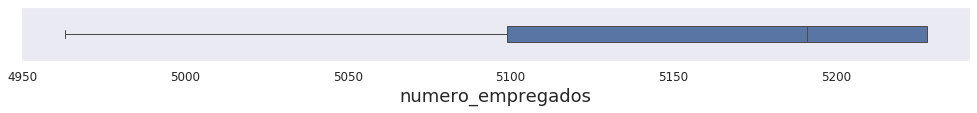

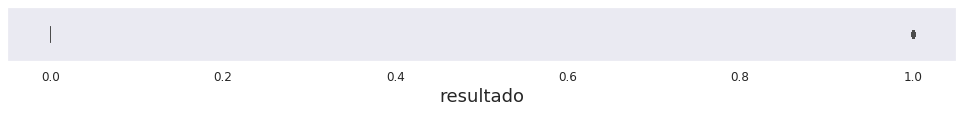

In [50]:
show_boxplot(df_callcenter, *list_columns)

#### Notas

- A variável `idade` apresenta outliers, contudo não se faz necessário tratar.


- `profissao`, `estado civil`, `educacao`, `meio_contato`, `mes`, `dia_semana` e `campanha_anterior` são variáveis provindas de valores categóricos.


- `inadimplente`, `emprestimo_pessoal`, `emprestimo_moradia` e `resultado` são variáveis categóricas que eram sim e nao. Além dessas, a variável `campanha_anterior` é um caso que apresenta somente 3 possíveis valores. Para estas variáveis, não cabe tratar outliers.


- `duracao` apresenta **2963 outliers**.
  - Analisando o boxplot, cabe aplicar a técnica de **rescale**
  - Analisar qual o tempo mínimo e máximo para `resultado == sim`
  - Testar a hipótese: se `duracao == 0`, então `resultado == nao`.<br/>
    OBS: caso resultado POSITIVO, poderá ser algum resultado de campanha anterior


- `qtd_contatos_campanha` apresenta **2406 outliers**. 
  - Analisando o boxplot, cabe aplicar a técnica de **rescale**.


- `qtd_contatos_total` apresenta **5625 outliers**.
  - Neste caso, qualquer contato > 0 já foi considerado outlier. Então, cabe testar a hipótese: se `qtd_contatos_total == 0`, então `resultado NEGATIVO`.<br/>
  OBS: qtd_contatos_total é número de contatos realizados antes desta campanha e para este cliente


- `dias_ultimo_contato` apresenta outlier porque ficou registrado no dataset 999 dias em casos que não se tem uma previsão de último contato. Então isso se torna um outlier que precisa ser tratado.
  - Neste caso, irei subtituir o valor 999 por 0 pois isso deixará uma distribuição mais perto da normal


- `indice_confianca_consumidor` apresenta **446 outliers**.
  - São poucos outliers, por isso não irei aplicar alguma técnica de tratamento de outliers.


 - `indice_precos_consumidor`, `euribor3m`, `numero_empregados` não apresentam outliers.

#### Anásile de Tempo Mínimo e Máximo para `resultado == sim`

In [51]:
df_min = df_callcenter[['resultado','duracao']].sort_values(['duracao'])

print('Minimum duration in sec: \n{}\n'.format(df_min.query('resultado == 1').iloc[0]))
print('Maximum duration in sec: \n{}'.format(df_min.query('resultado == 1').iloc[-1]))

Minimum duration in sec: 
resultado     1
duracao      37
Name: 24016, dtype: int16

Maximum duration in sec: 
resultado       1
duracao      4199
Name: 22192, dtype: int16


- A partir de 37 segundos surge o primeiro resultao posivito
- Até 4199 segundos pode ocorrer um resultado positivo

Acredito que remover valores entre estes limites de duracao pode afetar o treinamento, por isso irei manter.

#### Tratamento de Outliers

- **Hipótese**:
Se `duracao == 0`, então `resultado NEGATIVO`

In [52]:
# 'resultado': {'nao': 0, 'sim': 1}

df_min = df_callcenter[['duracao','resultado']]
len(df_min.query('duracao == 0 & resultado == 1'))

0

Não há casos em que a ligação durou 0 minutos e o resultado foi positivo. Então, a partir disso, esta confirmado os outliers. Vou eliminar as tuplas que apresentam a condição da hipótese levantada.

In [53]:
print(f'Rows before operation = {df_callcenter.shape[0]}')

cond_duracao = (df_callcenter.duracao > 0) 
df_callcenter = df_callcenter[cond_duracao]

print(f'Rows after operation = {df_callcenter.shape[0]}')

Rows before operation = 41176
Rows after operation = 41172


- **Hipótese**: Se `qtd_contatos_total == 0`, então `resultado NEGATIVO`.

In [54]:
df_min = df_callcenter[['resultado','qtd_contatos_total']]

len(df_min.query('resultado == 1 & qtd_contatos_total == 0'))

3140

A princípio esta hipótese não foi válida, ou seja, mesmo que `qtd_contatos_total == 0`, há resultado POSITIVOS. Isso significa que deve haver pelo menos 1 contato da `qtd_contatos_total`

- **rescale**: `duracao`, `qtd_contatos_campanha`

In [55]:
def plot_distribuition(df: 'dataframe', column: str):
    plt.figure()
    df[column].plot.hist(alpha=0.5, color='blue', bins=20)
    plt.title(f"Distribuição da Coluna {column}")
    plt.show()

    sns.boxplot(x=df[column],
                width=0.5,
                showfliers=True)

In [56]:
def apply_log(df: 'dataframe' = None,
              fix: int = 0,
              type_col: 'number' = 'int16',
              column: str = None):
    
    skew_before = df[column].skew()
    df[column] = [np.log(x + fix).astype(type_col) for x in df[column]]
    skew_after = df[column].skew()
    
    return f'Skew before = {skew_before} -> Skew after = {skew_after}'

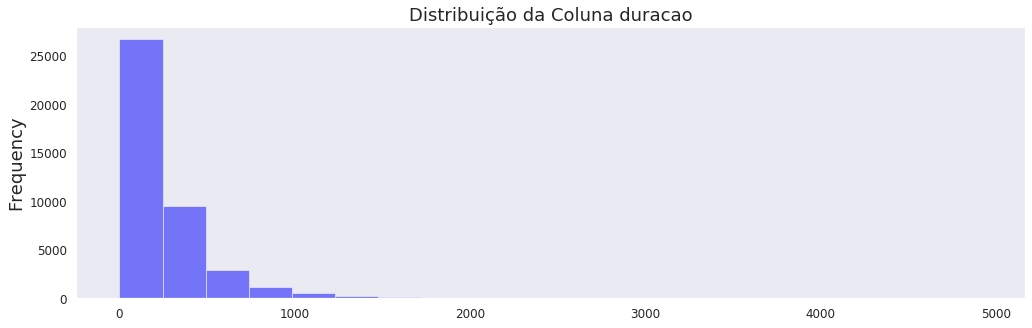

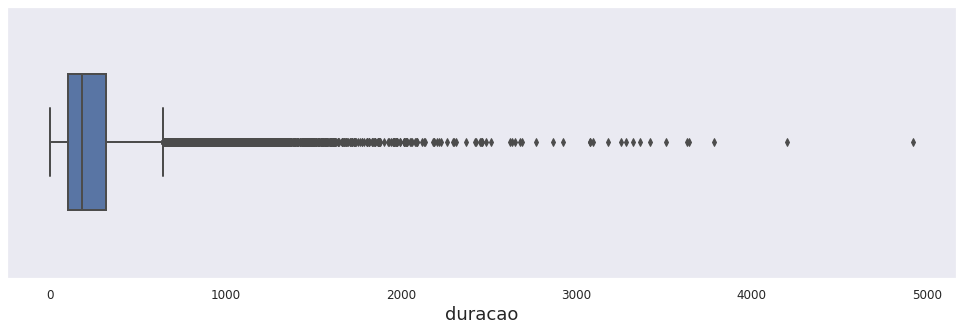

In [57]:
plot_distribuition(df_callcenter, 'duracao')

In [58]:
apply_log(df = df_callcenter,
          fix= 1,
          type_col = int,
          column = 'duracao')

'Skew before = 3.2629266391894887 -> Skew after = -0.36097330757266477'

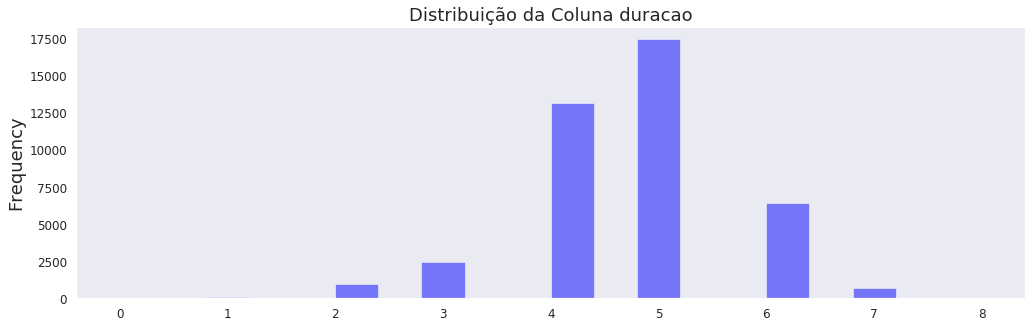

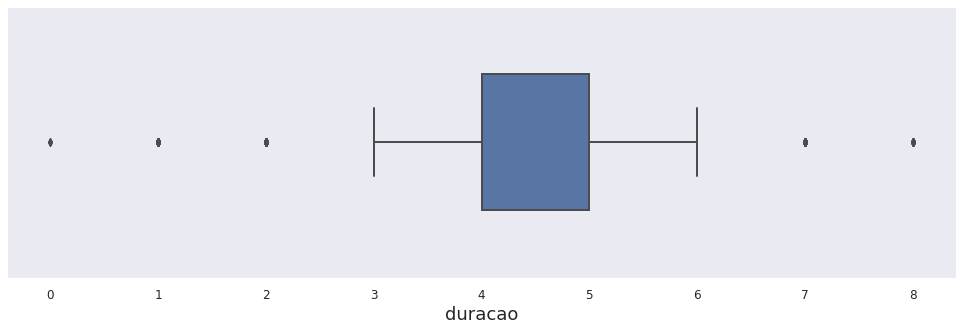

In [59]:
plot_distribuition(df_callcenter, 'duracao')

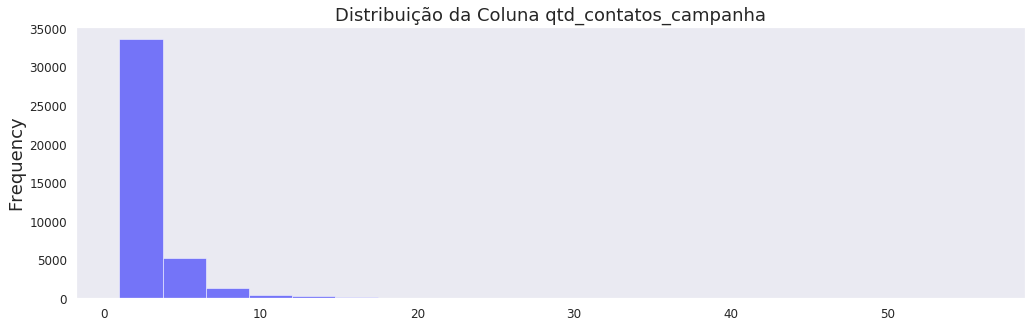

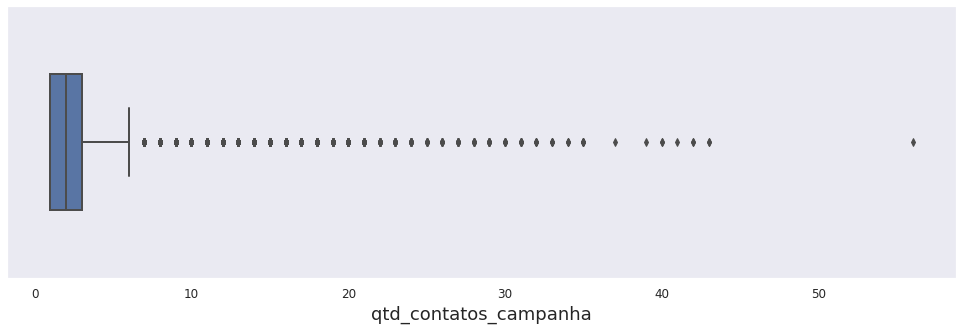

In [60]:
plot_distribuition(df_callcenter, 'qtd_contatos_campanha')

In [61]:
apply_log(df = df_callcenter,
          type_col = int,
          column = 'qtd_contatos_campanha')

'Skew before = 4.762876793279734 -> Skew after = 1.4681637368669567'

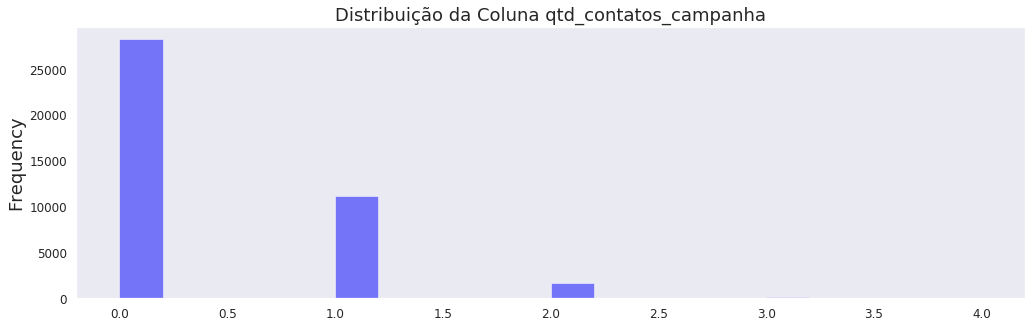

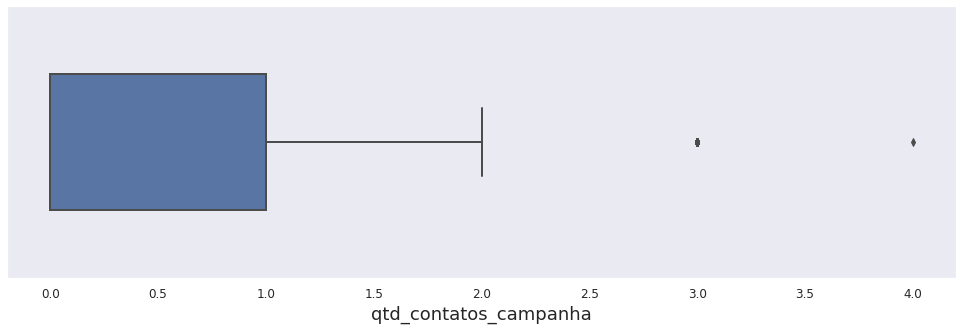

In [62]:
plot_distribuition(df_callcenter, 'qtd_contatos_campanha')

- `dias_ultimo_contato` substituição de valores

In [63]:
df_callcenter['dias_ultimo_contato'] = df_callcenter['dias_ultimo_contato'].replace(999, 1)

count_row_999 = len(df_callcenter.query('dias_ultimo_contato == 999'))
print(f'Rows with (dias_ultimo_contato == 999), after operation = {count_row_999}')

Rows with (dias_ultimo_contato == 999), after operation = 0


---

## Armazenamento dos Dados Limpos

In [64]:
def save_data_clenning(df: 'dataframe' = None,
                       path: str = 'reports/') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')
    
    return "Data storage!"

In [65]:
save_data_clenning(df_callcenter, 'reports/callcenter_marketing_clenning.csv')

'Data storage!'